In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
import modred as mr
import numpy.matlib as ml
import scipy.interpolate as interp
from importlib import reload
import PODutils
import PIVutils

In [2]:
reload(PIVutils)
X, Y, U, V, W, Cond = PIVutils.importMatlabPIVdata('/Users/Owen/Dropbox/Data/ABL/Heat Flux Data/Processed Results/N/Neutral45.mat',['X','Y','U','V','W'],['Cond'])

In [3]:
#Rearange data into correct shape (rows all the data for a single snapshot, columns each shapshot)
uSize = U.shape
uSize

(136, 133, 5000)

In [4]:
#Do 2D interpolation to remove any NaNs or find locations of NaNs 
#for i in range(uSize[2]):
#    U[:,:,i] = interp.interp2d(X, Y, U[:,:,i], kind='linear')

#Find the locations of all NaNs
NanLocs = np.isnan(U)
#U[NanLocs] = 0
    

In [5]:
#Calculate mean velocity profiles
Umean = np.nanmean(U,axis=(2,1))
Umean
Umean.shape
#print(Umean)

Umean = np.transpose(np.tile(Umean,(uSize[2],uSize[1],1)),(2,1,0))
#print(Umean.shape)

#Subtract mean velocity profiles from velocity fields
Uf = U - Umean;
Vf = V; #<--Mean in vertical is aprox zero
Wf = W
del Umean

In [6]:
#Set all NaNs to zero so that POD can run
Uf[NanLocs] = 0
Vf[NanLocs] = 0
Wf[NanLocs] = 0

# Run POD

###### Test shape of matrix needed for POD function
num_vecs = 50;  #<-- equivalent to the number of PIV snapshots (Also number of total POD modes)

vecs = np.random.random((100, num_vecs))
vecs.shape

In [7]:
uAll = np.concatenate((Uf.reshape(uSize[0]*uSize[1],uSize[2]), Vf.reshape(uSize[0]*uSize[1],uSize[2]), Wf.reshape(uSize[0]*uSize[1],uSize[2])), axis = 0)
uAll.shape      

(54264, 5000)

In [8]:
num_modes = 50;
modes, eig_vals = mr.compute_POD_matrices_snaps_method(uAll, list(range(num_modes)))

In [9]:
menergy = eig_vals/np.sum(eig_vals)
menergy_sum = np.zeros(len(menergy))
for i in range(len(menergy)):
    menergy_sum[i] = np.sum(menergy[:i]);

In [10]:
menergy_sum[-1]

0.99999938426010715

fig, ax = plt.subplots()
ax.bar(range(num_modes),menergy[1:num_modes]*100)

In [11]:
reload(PODutils)
Umodes, Vmodes, Wmodes = PODutils.reconstructPODmodes(modes,uSize,num_modes,3)

In [12]:
Wmodes.shape

(136, 133, 50)

In [13]:
#Calculate the mode coefficients
C = modes.transpose()*uAll

In [14]:
C.shape

(50, 5000)

# Plot modal energy and contribution total

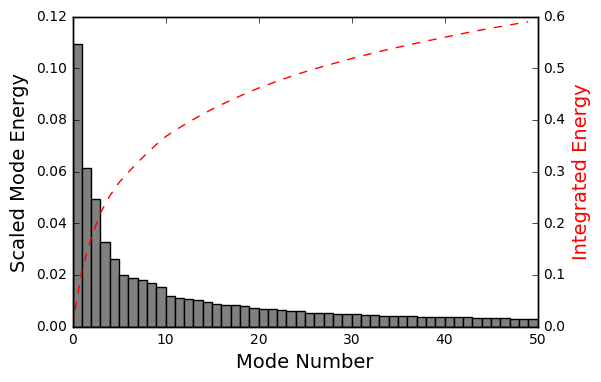

In [15]:
ind = np.arange(num_modes)  # the x locations for the groups
width = 1       # the width of the bars

f = plt.figure()
ax = plt.gca()
ax2 = plt.twinx()
rect = ax.bar(ind,menergy[:num_modes], width, color='gray')
line = ax2.plot(ind,menergy_sum[:num_modes],'--r')

ax.set_xlabel("Mode Number",fontsize=14)
ax.set_ylabel("Scaled Mode Energy",fontsize=14)
ax2.set_ylabel("Integrated Energy",fontsize=14,color='red')

# Plot some modes

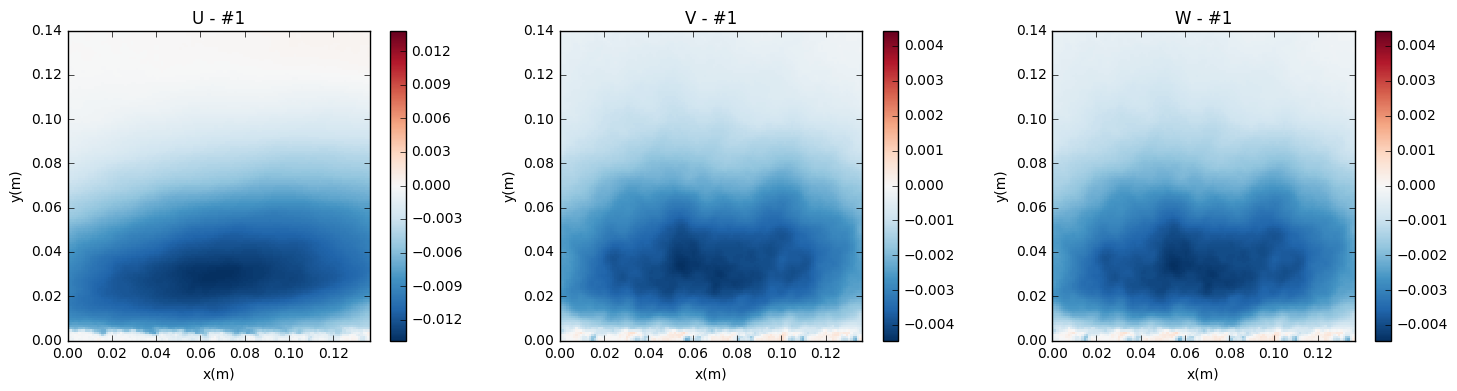

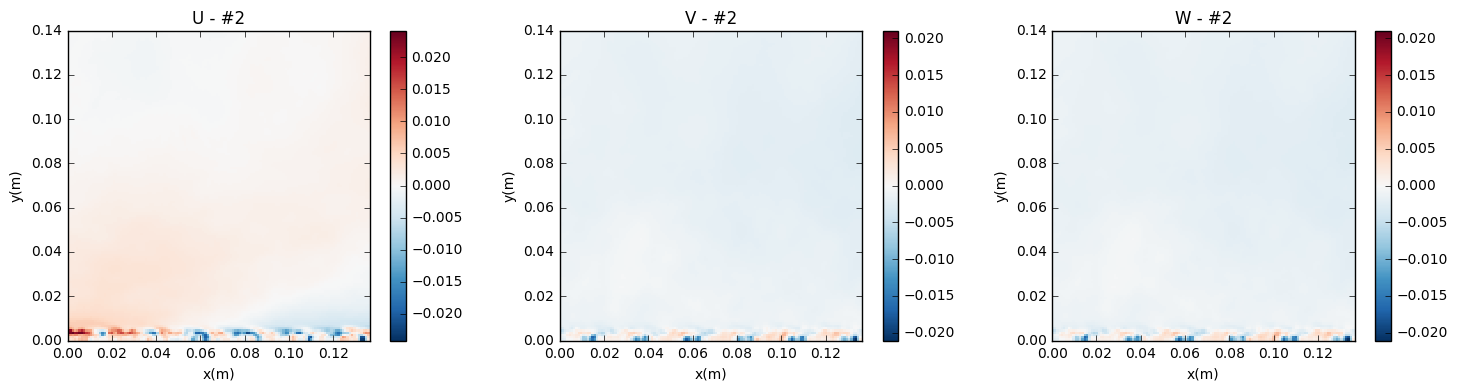

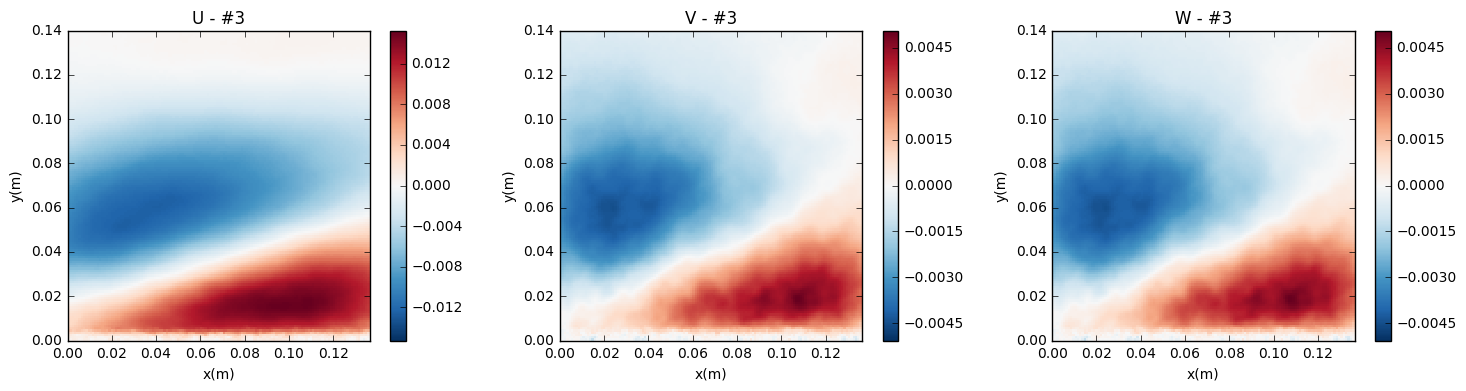

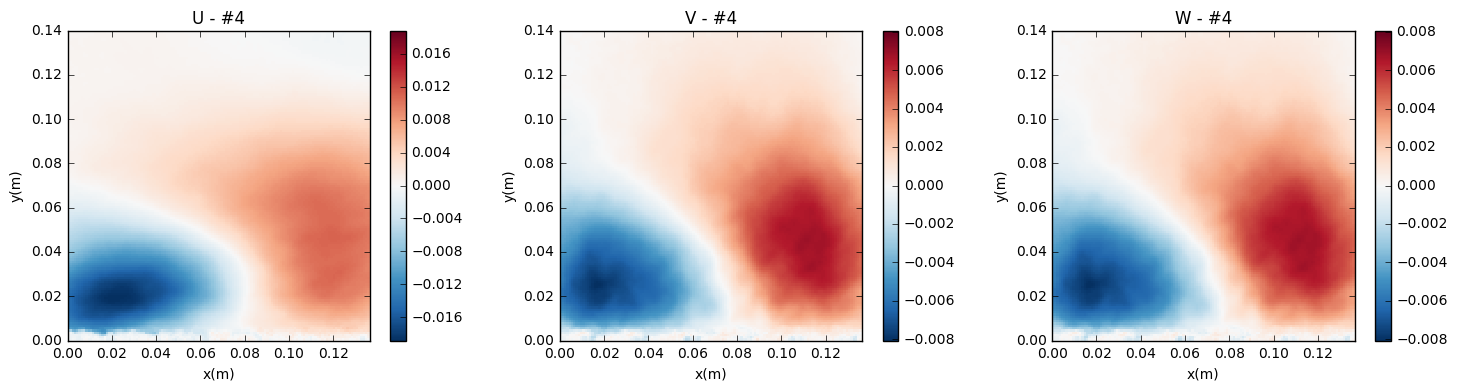

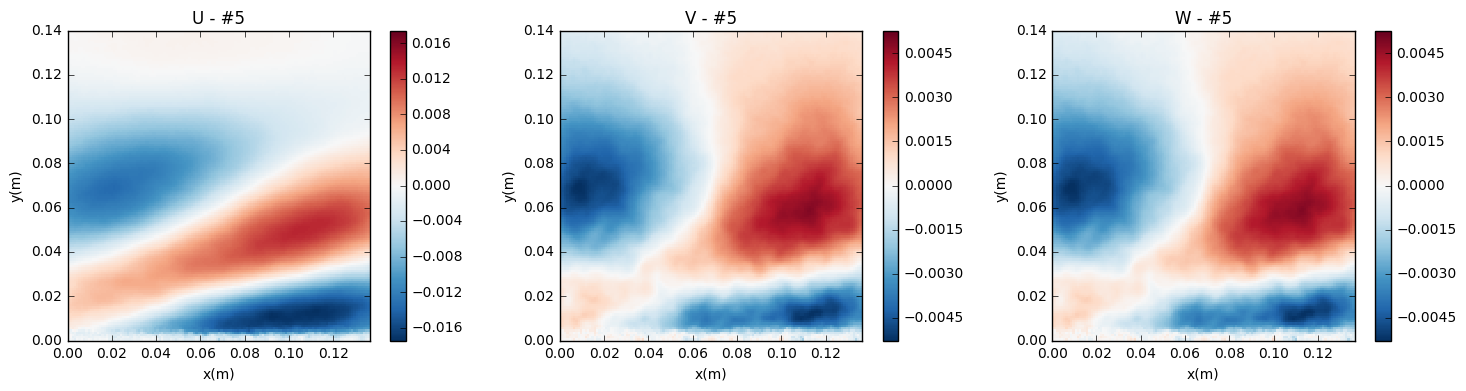

In [16]:
reload(PODutils)
PODutils.plotPODmodes3D(X,Y,Umodes,Vmodes,Wmodes,list(range(5)))

# Plot the variation of the coefficients

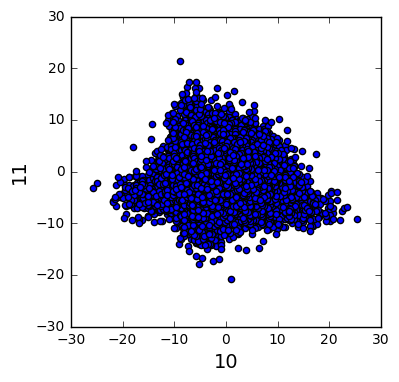

In [27]:
for i in range(10):
    plt.scatter(C[i,:],C[i+1,:])
    plt.axis('square')
    ax = plt.gca()
    ax.set_xlabel(i+1,fontsize=14)
    ax.set_ylabel(i+2,fontsize=14)